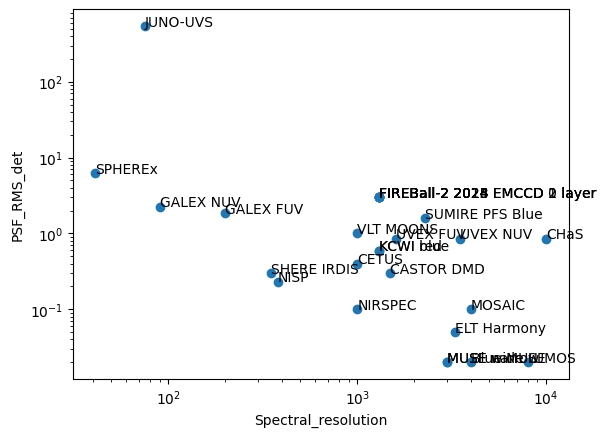

In [30]:
from astropy.io import ascii
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from astropy.io import ascii

def table_to_array(table):
    import numpy as np

    return np.lib.recfunctions.structured_to_unstructured(table.as_array())
def plot_instrument(table,xn,yn,xlog=True, ylog=True):
    plt.figure()
    x = table_to_array(a[a["Charact."]==xn][a.colnames[3:]])
    y = table_to_array(a[a["Charact."]==yn][a.colnames[3:]])
    plt.plot(x,y,"o")
    plt.xlabel(xn)
    plt.ylabel(yn)
    if xlog:
        plt.xscale("log")
    if ylog:
        plt.yscale("log")
    for i,name in enumerate(a.colnames[3:]):
        plt.text(x[0][i],y[0][i],name)
    return 


def plot_instrument(table,xn,yn,xlog=True, ylog=True):
    a = table.to_pandas()
    plt.figure()
    plt.plot(a.eval(xn),a.eval(yn),"o")
    plt.xlabel(xn)
    plt.ylabel(yn)
    if xlog:
        plt.xscale("log")
    if ylog:
        plt.yscale("log")
    for i, line in enumerate(tr):
        plt.text(a.eval(xn)[i],a.eval(yn)[i],a["Charact."][i])
    return 


a = Table.read("/Users/Vincent/Github/fireball2-etc/notebooks/instruments.csv",format="csv")
tr = ascii.read("/Users/Vincent/Github/fireball2-etc/notebooks/instruments - Transposed.csv",format="csv",header_start=1,data_start=3)

plot_instrument(tr,"Spectral_resolution","PSF_RMS_det")


# tr

# plot_instrument(a,"Spectral_resolution","PSF_RMS_det")
#%%



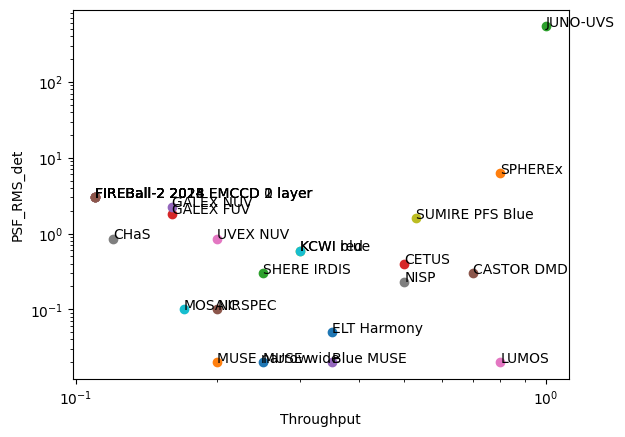

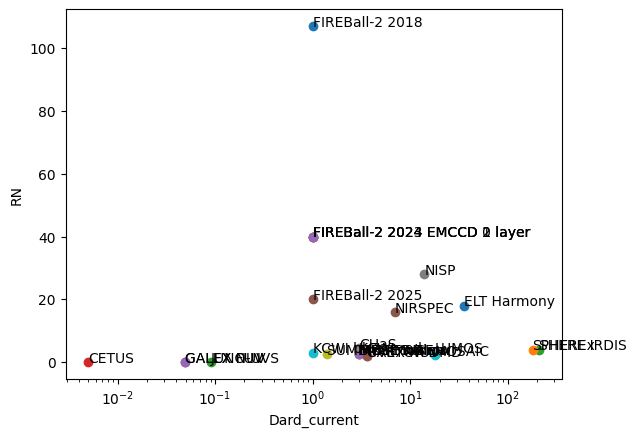

In [18]:
plot_instrument(a,"Throughput","PSF_RMS_det")
plot_instrument(a,"Dard_current","RN",ylog=False)#,xlog=False)


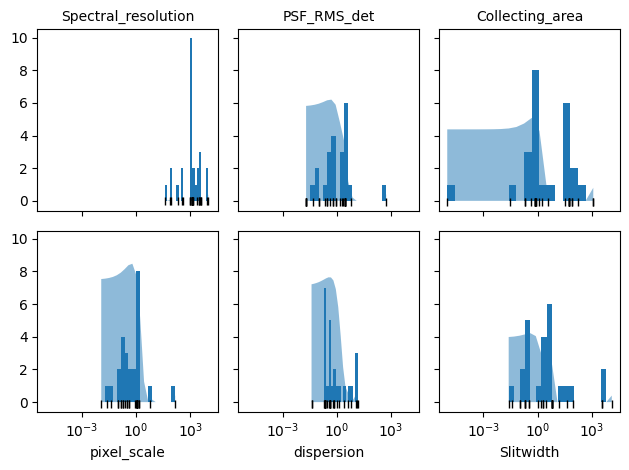

In [4]:


a = Table.read("/Users/Vincent/Github/fireball2-etc/notebooks/instruments - Transposed.csv",format="csv")
xn = "Spectral_resolution"
yn = "PSF_RMS_det"
# plt.loglog(a[xn],a[yn],"o")

fig, axes = plt.subplots(2,3,sharex=True,sharey=True)#"col"
vals = [xn,yn,"Collecting_area","pixel_scale","dispersion","Slitwidth"]
for i, ax in enumerate(axes.flatten()):
    x_d = np.logspace(np.log10(np.nanmin(a[vals[i]])),np.log10(np.nanmax(a[vals[i]])),20)
    # x_d = np.linspace(np.nanmin(a[vals[i]]),np.nanmax(a[vals[i]]),20)

    hist = ax.hist(a[vals[i]],bins=x_d, )
    density, bins, patches = hist
    widths = bins[1:] - bins[:-1]
    density = sum(norm(xi).pdf(x_d) for xi in a[vals[i]])
        
    ax.fill_between(x_d, density, alpha=0.5)
    ax.plot(a[vals[i]], np.full_like(a[vals[i]], -0.1), '|k', markeredgewidth=1)

    
    
    ax.set_xscale("log")
    if i>2:
        ax.set_xlabel(vals[i],fontsize=10)
    else:
        ax.set_title(vals[i],fontsize=10)
# ax.set_ylim((0,10))       
fig.tight_layout()
